## Vintern-1B-v3.5

In [1]:
import time
start = time.time()
!pip install -q timm einops peft wandb deepspeed accelerate bitsandbytes decord tensorboardX gdown
!pip install -q -U datasets
!pip install -q transformers==4.47.0
!pip install -q flash_attn==2.7.2.post1
print(f"Installed time: ", round(time.time()-start, 2), "seconds.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 28.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 101.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00

In [2]:
!git clone https://github.com/tuanna712/PixeFlow.git /kaggle/working/PixeFlow > /dev/null 2>&1

!git clone https://github.com/5CD-AI/Vintern.git > /dev/null 2>&1
%cd Vintern

!mkdir -p pretrained
%cd pretrained/

# Download 5CD-AI/Vintern-1B-v2 ---- Vision Part:InternViT‑300M‑448px + Language Part: Qwen2‑0.5B‑Instruct
# !huggingface-cli download --resume-download --local-dir-use-symlinks False 5CD-AI/Vintern-1B-v2 --local-dir Vintern-1B-v2 > /dev/null 2>&1
!huggingface-cli download --resume-download --local-dir-use-symlinks False 5CD-AI/Vintern-1B-v3_5 --local-dir Vintern-1B-v3_5 > /dev/null 2>&1

/kaggle/working/Vintern
/kaggle/working/Vintern/pretrained


In [3]:
import torch
import sys, os
sys.path.append("/kaggle/working/PixeFlow/prep")

from imageProcessing.FrameOCR.Vintern1B.desc_gen import DescGenerator

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
DescGen = DescGenerator(model_name="/kaggle/working/Vintern/pretrained/Vintern-1B-v3_5")

configuration_internvl_chat.py: 0.00B [00:00, ?B/s]

configuration_intern_vit.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
2025-08-22 08:01:44.451661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755849704.776251      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def get_image(path, show=False):
    image = Image.open(path).convert('RGB')
    image = np.array(image)
    if show:
        plt.imshow(image)
        plt.show()
    return image

In [6]:
prompt_1 = """
    You are master of Optical Character Recognition, Objects Detection and Image description generator
    Return all detected words in the image, normally in Vietnamese
    Give the description of the image in detail, decribe what in the image and any activities if possible
    Follow the dictionary output structure bellow:
    Always keep the dictionary output in the structure the same as bellow.
    {
        "ocr":"text",
        "desc":"description",
    }
    """
prompt_2 = """
    You are master of Optical Character Recognition, Objects Detection and Image description generator
    Return all detected words in the image, normally in Vietnamese
    Give the description of the image in detail, decribe what in the image and any activities if possible
    Return a dictionary format and
    Always keep the dictionary output in the structure the same as bellow.
    {
        "ocr":"text",
        "desc":"description",
    }
    """

In [7]:
def gen_info(image_path, prompt=None):
    if prompt:
        prompt=prompt
    else:
        prompt = """
        You are master of Optical Character Recognition, Objects Detection and Image description generator
        Return all detected words in the image, normally in Vietnamese
        Give the description of the image in detail, decribe what in the image and any activities if possible
        Return a dictionary format and
        Follow the dictionary output structure bellow:
        Always keep the dictionary output in the structure the same as bellow.
        if no text, return ocr as empty
        {
            "ocr":"text",
            "desc":"description",
        }
        """
    image = get_image(image_path)
    start = time.time()
    response = DescGen.get_description(image, prompt)
    print(response)
    print(f"\nRunning time: {round(time.time()-start, 4)} seconds.")

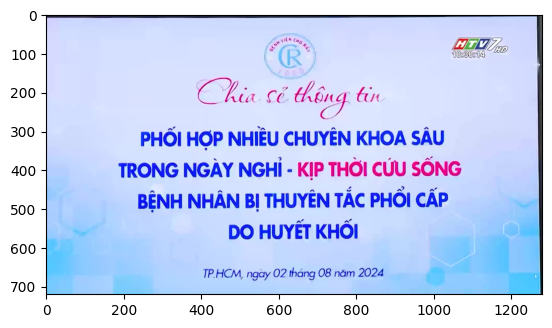

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


```json
{
  "ocr": "Chia sẻ thông tin\nPhối hợp nhiều chuyên khoa sâu trong ngày nghỉ - kịp thời cứu sống\nBệnh nhân bị thuyên tắc phổi cấp do huyết khối\nTP.HCM, ngày 02 tháng 08 năm 2024",
  "desc": "This image contains information about a medical event in Ho Chi Minh City on August 2nd, 2024. The event involved coordinating efforts among various medical specialties during a day off to provide timely medical care for patients with severe respiratory issues due to heart failure."
}
```

Running time: 8.001 seconds.


In [9]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L22/keyframes/L22_V002/004.jpg"
from PIL import Image
get_image(image_path, show=True)
gen_info(image_path)

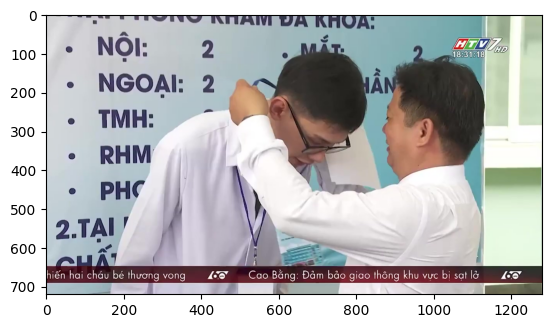

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


```json
{
    "ocr": "Nội: 2, Ngoại: 2, TMH: 2, RHM: 2, PHO: 2, TẠI: 1, CHẤT: 1",
    "desc": "The image shows a medical examination taking place in a hospital setting. A male doctor is examining a young patient, possibly a child, who is wearing a white coat. The background includes a sign with Vietnamese text and the logo of HTV7."
}
```

Running time: 7.7286 seconds.


In [17]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L22/keyframes/L22_V002/023.jpg"
get_image(image_path, show=True)
gen_info(image_path)

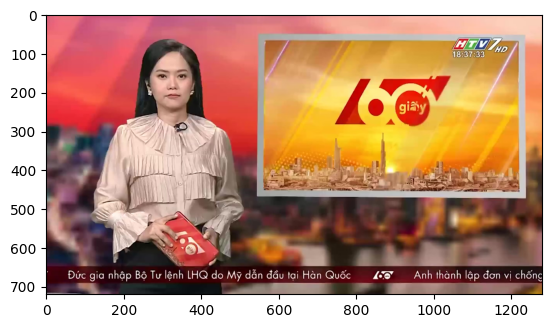

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


```json
{
  "ocr": "Đức gia nhập Bộ Tư lệnh LHQ do Mỹ dẫn đầu tại Hàn Quốc\nAnh thành lập đơn vị chống",
  "desc": "The image shows a news broadcast from HTV7 HD, featuring a female news anchor presenting the news. The text on the screen includes information about an American-led coup in South Korea and the formation of an anti-American resistance group."
}
```

Running time: 6.8258 seconds.


In [18]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L22/keyframes/L22_V002/123.jpg"
get_image(image_path, show=True)
gen_info(image_path)

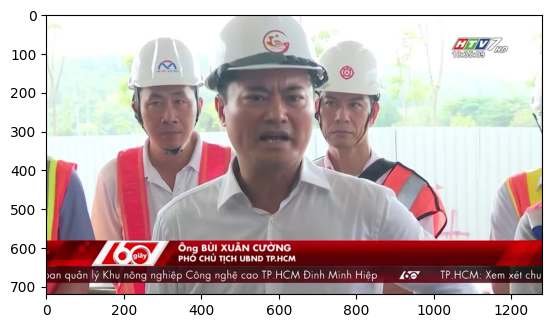

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Ảnh chụp một cảnh quay từ chương trình truyền hình, có thể là một cuộc phỏng vấn hoặc bài báo về công việc xây dựng.

**Đối tượng:** Ông Bùi Xuân Cường, Phó Chủ tịch UBND TP.HCM Đinh Minh Hiệp.

**Dòng chữ chính:** "Ông Bùi Xuân Cường
Phó Chủ tịch UBND TP.HCM
Đinh Minh Hiệp
TP.HCM: Xem xét chuyên"

Running time: 6.7979 seconds.


In [21]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L22/keyframes/L22_V002/093.jpg"
get_image(image_path, show=True)
prompt = """
        Lấy ra 'bối cảnh', 'đối tượng' và 'dòng chữ chính' trong ảnh ứng với 3 dòng
        """
gen_info(image_path, prompt)


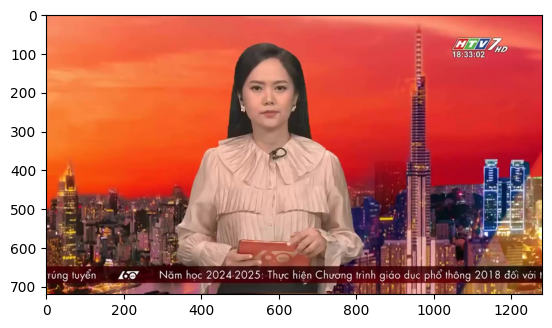

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Bối cảnh là một chương trình truyền hình đang phát sóng, với hình ảnh thành phố hiện đại ở phía sau và logo HTV7 HD ở góc trên bên phải.

**Đối tượng:** Một nữ phóng viên đang đứng trước máy quay, mặc áo sơ mi màu be nhạt. Cô ấy đang cầm một cuốn sách hoặc tài liệu trong tay.

**Dòng chữ chính:**  'Năm học 2024-2025: Thực hiện Chương trình giáo dục phổ thông 2018 đối với...'

Running time: 7.5208 seconds.


In [22]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L22/keyframes/L22_V002/066.jpg"
get_image(image_path, show=True)
prompt = """
        Lấy ra 'bối cảnh', 'đối tượng' và 'dòng chữ chính' trong ảnh ứng với 3 dòng
        """
gen_info(image_path, prompt)

In [ ]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/093.jpg"
get_image(image_path, show=True)
gen_info(image_path)

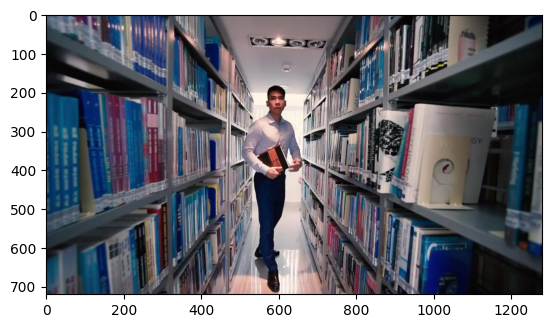

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Thư viện
**Đối tượng:** Học sinh
**Dòng chữ chính:** Không có

Running time: 3.4218 seconds.


In [10]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/293.jpg"
get_image(image_path, show=True)
prompt = """
        Lấy ra 'bối cảnh', 'đối tượng' và 'dòng chữ chính' trong ảnh ứng với 3 dòng
        """
gen_info(image_path, prompt)

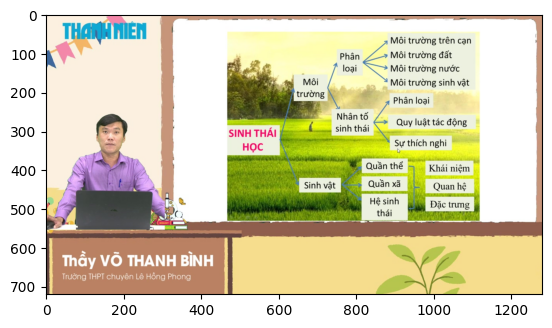

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Trang web Thanh Niên
**Đối tượng:** Giáo viên, chủ đề sinh thái học
**Dòng chữ chính:** Sinh thái học

Running time: 3.6626 seconds.


In [11]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/022.jpg"
get_image(image_path, show=True)
gen_info(image_path, prompt)

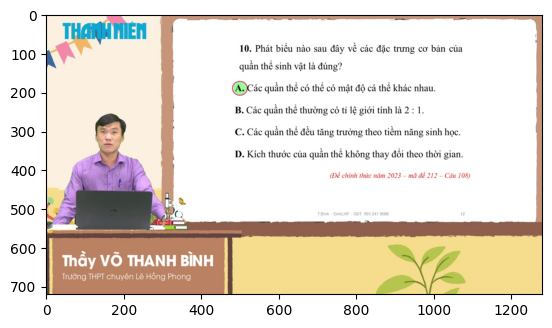

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


{
    "ocr": "10. Phát biểu nào sau đây về các đặc trưng cơ bản của quần thể sinh vật là đúng?",
    "desc": "Đề bài về đặc trưng cơ bản của quần thể sinh vật, với 4 đáp án được đưa ra: A. Các quần thể có thể có mật độ cá thể khác nhau; B. Các quần thể thường có tỉ lệ giới tính là 2:1; C. Các quần thể đều tăng trưởng theo tiềm năng sinh học; D. Kích thước của quần thể không thay đổi theo thời gian."
}

Running time: 7.7413 seconds.


In [12]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/152.jpg"
get_image(image_path, show=True)
prompt = """
        You are master of Optical Character Recognition, Objects Detection and Image description generator
        Return all detected words in the image, normally in Vietnamese
        Give the description of the image in detail, decribe what in the image and any activities if possible
        Follow the dictionary output structure bellow:
        Always keep the dictionary output in the structure the same as bellow.
        Always focus on all texts on image. If no text, {"ocr":""}
        {
            "ocr":"text",
            "desc":"description",
        }
        """
gen_info(image_path, prompt)

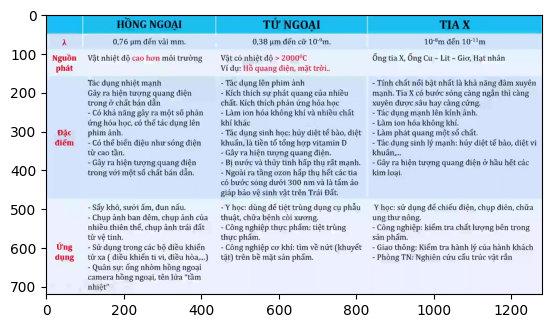

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Ảnh mô tả các đặc điểm và ứng dụng của hai loại vật liệu: Hồng ngoại, Tử ngoại và Tia X.

**Đối tượng:** Các loại vật liệu này được sử dụng trong nhiều lĩnh vực khác nhau, bao gồm:

* **Hồng ngoại:** Vật nhiệt độ cao hơn môi trường (0,76 µm đến vài mm), có khả năng gây ra hiện tượng quang điện trong chất bán dẫn.
* **Tử ngoại:** Vật có nhiệt độ > 2000°C (ví dụ: Hồ quang điện, mặt trời...

Running time: 7.8218 seconds.


In [14]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V022/152.jpg"
get_image(image_path, show=True)
prompt = """
        Lấy ra 'bối cảnh', 'đối tượng' và 'dòng chữ chính' trong ảnh ứng với 3 dòng
        """
gen_info(image_path, prompt)

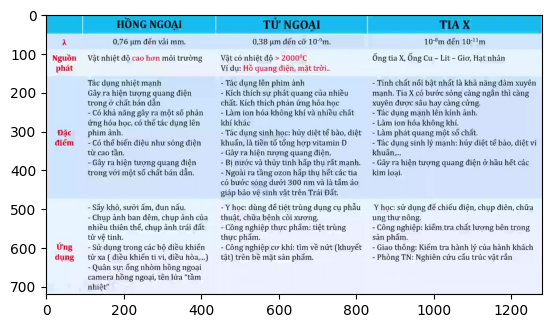

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Ảnh là một bảng so sánh giữa 'Hồng Ngoại', 'Tử Ngoại' và 'Tia X'.
**Đối tượng:** Bảng liệt kê các đặc điểm, ứng dụng và nguồn phát của từng loại vật thể.
**Dòng chữ chính:** Các dòng này mô tả chi tiết về tính năng, ứng dụng và nguồn gốc của mỗi loại vật thể.

Running time: 6.0273 seconds.


In [15]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V022/155.jpg"
get_image(image_path, show=True)
gen_info(image_path, prompt)

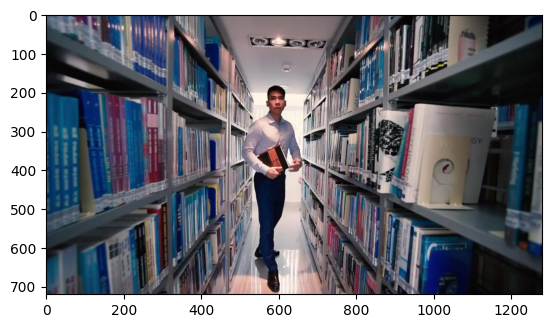

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


**Bối cảnh:** Thư viện
**Đối tượng:** Học sinh
**Dòng chữ chính:** Không có

Running time: 3.8449 seconds.


In [16]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/293.jpg"
get_image(image_path, show=True)
gen_info(image_path, prompt)

In [ ]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/293.jpg"
get_image(image_path, show=True)
prompt_desc = """
        You are master of Image description generation.
        In detail, describe the image focus on objects, actions and context of the image
        """
prompt_ocr = """
        You are master of Optical Character Recognition.
        Return all detected Vietnamese words in the image
        Always focus on all texts on image. If no text, return None
        """
gen_info(image_path, prompt_ocr)
gen_info(image_path, prompt_desc)

In [ ]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V012/022.jpg"
get_image(image_path, show=True)
prompt_desc = """
        You are master of Image description generation.
        In detail, describe the image focus on objects, actions and context of the image
        """
prompt_ocr = """
        You are master of Optical Character Recognition.
        Return all detected Vietnamese words in the image
        Always focus on all texts on image. If no text, return None
        """
gen_info(image_path, prompt_ocr)
gen_info(image_path, prompt_desc)

In [ ]:
image_path = "/kaggle/input/pf-data-frames/Keyframes_L25/keyframes/L25_V022/155.jpg"
get_image(image_path, show=True)
prompt_desc = """
        You are master of Image description generation.
        In detail, describe the image focus on objects, actions and context of the image
        """
prompt_ocr = """
        You are master of Optical Character Recognition.
        Return all detected Vietnamese words in the image
        Always focus on all texts on image. If no text, return None
        """
gen_info(image_path, prompt_ocr)
gen_info(image_path, prompt_desc)